In [26]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../data/test.csv')

In [35]:
df.head(10)

,Date,Close,first_difference
0,2013-12-31,35.691666,-0.933334
1,2014-01-01,34.758331,-0.458332
2,2014-01-02,34.299999,-0.391666
3,2014-01-03,33.908333,0.183334
4,2014-01-06,34.091667,-0.800003
5,2014-01-07,33.291664,-0.708332
6,2014-01-08,32.583332,0.558334
7,2014-01-09,33.141666,0.308334
8,2014-01-10,33.450001,1.108334
9,2014-01-13,34.558334,-0.208336


In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.reindex(pd.date_range(df.index.min(), df.index.max())).sort_index(ascending=False).reset_index().rename(columns={'index': 'Date'})

In [37]:
df.head(10)

,Date,Close,first_difference
0,2022-10-11,65.949997,0.000000
1,2022-10-10,67.550003,-1.600006
2,2022-10-09,NaN,NaN
3,2022-10-08,NaN,NaN
4,2022-10-07,67.449997,0.100006
5,2022-10-06,67.750000,-0.300003
6,2022-10-05,NaN,NaN
7,2022-10-04,67.300003,0.449997
8,2022-10-03,66.699997,0.600006
9,2022-10-02,NaN,NaN


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('d').sort_index(ascending=False).reset_index().rename(columns={'index': 'Date'})

In [38]:
df = df.fillna(method='bfill').fillna(method='ffill')

Text(0.5, 0.98, 'Additive  Decompose')

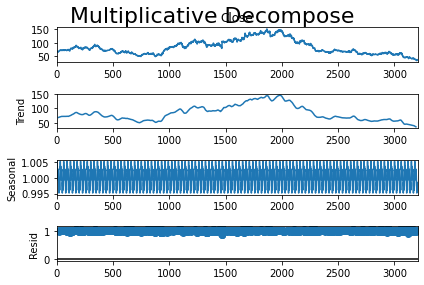

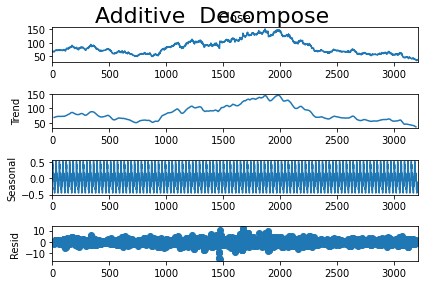

In [32]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df.Close, model='multiplicative', period = 30)

# Additive Decomposition
result_add = seasonal_decompose(df.Close, model='additive',period = 30)

# plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive  Decompose', fontsize=22)

In [39]:
df.head(10)

,Date,Close,first_difference
0,2022-10-11,65.949997,0.000000
1,2022-10-10,67.550003,-1.600006
2,2022-10-09,67.449997,0.100006
3,2022-10-08,67.449997,0.100006
4,2022-10-07,67.449997,0.100006
5,2022-10-06,67.750000,-0.300003
6,2022-10-05,67.300003,0.449997
7,2022-10-04,67.300003,0.449997
8,2022-10-03,66.699997,0.600006
9,2022-10-02,66.949997,-0.250000
